In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習モジュール
import sklearn

# 小数第３まで表示
%precision 3

'%.3f'

In [3]:
data=pd.read_csv('NYC_accidents_heat_map.csv',parse_dates = [0])

/home/lecture/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head(10)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2017-11-06,0:00,BROOKLYN,11203,40.660206,-73.937750,"(40.660206, -73.93775)",NaN,NaN,699 RUTLAND ROAD,...,Unspecified,NaN,NaN,NaN,3784601,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN
1,2017-11-06,0:00,BROOKLYN,11207,40.655266,-73.888170,"(40.655266, -73.88817)",NaN,NaN,922 PENNSYLVANIA AVENUE,...,Unspecified,NaN,NaN,NaN,3784228,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
2,2017-11-06,0:00,BROOKLYN,11208,40.677700,-73.874050,"(40.6777, -73.87405)",LIBERTY AVENUE,CHESTNUT STREET,NaN,...,Unspecified,NaN,NaN,NaN,3785108,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
3,2017-11-06,0:00,MANHATTAN,10036,NaN,NaN,NaN,WEST 48 STREET,12 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3784857,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN
4,2017-11-06,0:00,QUEENS,11101,40.752983,-73.910620,"(40.752983, -73.91062)",NaN,NaN,50-92 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,3784260,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
5,2017-11-06,0:00,NaN,NaN,40.845837,-73.892006,"(40.845837, -73.892006)",EAST TREMONT AVENUE,BELMONT AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3786088,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
6,2017-11-06,0:00,NaN,NaN,40.828150,-73.934910,"(40.82815, -73.93491)",WEST 155 STREET,MACOMBS PLACE,NaN,...,Unspecified,NaN,NaN,NaN,3783763,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN
7,2017-11-06,0:00,BROOKLYN,11221,40.697420,-73.931340,"(40.69742, -73.93134)",MYRTLE AVENUE,WILLOUGHBY AVENUE,NaN,...,Unspecified,Unspecified,NaN,NaN,3784840,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN
8,2017-11-06,0:00,BROOKLYN,11226,40.650387,-73.958720,"(40.650387, -73.95872)",CHURCH AVENUE,FLATBUSH AVENUE,NaN,...,NaN,NaN,NaN,NaN,3784910,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
9,2017-11-06,0:00,BRONX,10462,40.829160,-73.844086,"(40.82916, -73.844086)",ZEREGA AVENUE,CHATTERTON AVENUE,NaN,...,Turning Improperly,NaN,NaN,NaN,3785123,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


In [5]:
type(data['TIME'][1])

str

In [10]:
type(data['DATE'][1])

pandas._libs.tslib.Timestamp

In [6]:
type(data['BOROUGH'][1])

str

In [7]:
data['TIME'][3]

'0:00'

In [43]:
type(data['TIME'][1])

pandas._libs.tslib.Timestamp

In [8]:
#factor1がunspecifiedな行を削除
data=data[data['CONTRIBUTING FACTOR VEHICLE 1'] !='Unspecified']

In [9]:
data['TIME']=pd.to_datetime(data['TIME'],format='%H:%M')

In [9]:
#年ごとにデータを格納
data_2017=data[data['DATE'].dt.year==2017]
data_2016=data[data['DATE'].dt.year==2016]
data_2015=data[data['DATE'].dt.year==2015]
data_2014=data[data['DATE'].dt.year==2014]
data_2013=data[data['DATE'].dt.year==2013]
data_2012=data[data['DATE'].dt.year==2012]

In [10]:
data.to_csv('data.csv')
data_2017.to_csv("data_2017.csv")
data_2016.to_csv("data_2016.csv")
data_2015.to_csv("data_2015.csv")
data_2014.to_csv("data_2014.csv")
data_2013.to_csv("data_2013.csv")
data_2012.to_csv("data_2012.csv")

## データの基本的な値の調査

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585941 entries, 0 to 1149040
Data columns (total 29 columns):
DATE                             585941 non-null datetime64[ns]
TIME                             585941 non-null datetime64[ns]
BOROUGH                          400272 non-null object
ZIP CODE                         400222 non-null object
LATITUDE                         486685 non-null float64
LONGITUDE                        486685 non-null float64
LOCATION                         486685 non-null object
ON STREET NAME                   451982 non-null object
CROSS STREET NAME                416623 non-null object
OFF STREET NAME                  68814 non-null object
NUMBER OF PERSONS INJURED        585941 non-null int64
NUMBER OF PERSONS KILLED         585941 non-null int64
NUMBER OF PEDESTRIANS INJURED    585941 non-null int64
NUMBER OF PEDESTRIANS KILLED     585941 non-null int64
NUMBER OF CYCLIST INJURED        585941 non-null int64
NUMBER OF CYCLIST KILLED         585

In [12]:
#事故原因の出現回数
data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Driver Inattention/Distraction                           165600
Failure to Yield Right-of-Way                             53750
Fatigued/Drowsy                                           48452
Backing Unsafely                                          35732
Other Vehicular                                           34758
Turning Improperly                                        28121
Following Too Closely                                     26979
Lost Consciousness                                        20227
Prescription Medication                                   15900
Traffic Control Disregarded                               15353
Driver Inexperience                                       14896
Passing or Lane Usage Improper                            12623
Pavement Slippery                                         11211
Outside Car Distraction                                   10870
Unsafe Lane Changing                                      10641
Alcohol Involvement                     

In [ ]:
plt.

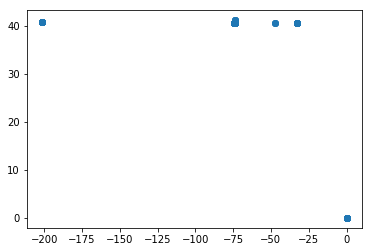

In [11]:
x=data['LONGITUDE']
y=data['LATITUDE']

plt.scatter(x,y)


# やること  
1. 事故原因、streetの相関

In [12]:
#平日のみを抽出
data_weekday = data[(data['DATE'].dt.weekday==0)\
                                                     |(data['DATE'].dt.weekday==1)\
                                                     |(data['DATE'].dt.weekday==2)\
                                                     |(data['DATE'].dt.weekday==3)\
                                                     |(data['DATE'].dt.weekday==4)]

data_weekday.to_csv("data_weekday.csv")
#休日のみを抽出
data_weekend = data[(data['DATE'].dt.weekday==5)|(data['DATE'].dt.weekday==6)]
data_weekend.to_csv("data_weekend.csv")

In [13]:
Borough_Cont_Factor=data.groupby(['BOROUGH','CONTRIBUTING FACTOR VEHICLE 1'])

In [14]:
data_frame1 = data_frame.groupby(['sex',''address]) #「性別」「住所」ごとに集約

SyntaxError: invalid syntax (<ipython-input-14-27264f9b66e5>, line 1)

In [15]:
Borough_Cont_Factor['DATE'].count()

BOROUGH        CONTRIBUTING FACTOR VEHICLE 1                        
BRONX          Accelerator Defective                                       65
               Aggressive Driving/Road Rage                               454
               Alcohol Involvement                                       1062
               Animals Action                                              55
               Backing Unsafely                                          3714
               Brakes Defective                                           362
               Cell Phone (hand-held)                                      19
               Cell Phone (hands-free)                                     14
               Driver Inattention/Distraction                           13742
               Driver Inexperience                                       1426
               Driverless/Runaway Vehicle                                  38
               Drugs (Illegal)                                           

In [18]:
from sklearn import preprocessing

label_encode = preprocessing.LabelEncoder()
#to convert into numbers
data_encode =data.apply(lambda x: label_encode.fit_transform(x))

TypeError: ("'>' not supported between instances of 'float' and 'str'", 'occurred at index BOROUGH')

In [ ]:
# 参考（カテゴリー変数をダミー特徴量として変換する方法）
mush_data_dummy = pd.get_dummies(mush_data[['gill_color','gill_attachment','odor','cap_color']])
mush_data_dummy.head()

In [21]:
data_dummy= pd.get_dummies(data[['BOROUGH','CONTRIBUTING FACTOR VEHICLE 1','VEHICLE TYPE CODE 1']])

In [111]:
data_dummy.head()

,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND,CONTRIBUTING FACTOR VEHICLE 1_Accelerator Defective,CONTRIBUTING FACTOR VEHICLE 1_Aggressive Driving/Road Rage,CONTRIBUTING FACTOR VEHICLE 1_Alcohol Involvement,CONTRIBUTING FACTOR VEHICLE 1_Animals Action,CONTRIBUTING FACTOR VEHICLE 1_Backing Unsafely,...,VEHICLE TYPE CODE 1_UNKNOWN,VEHICLE TYPE CODE 1_UTILI,VEHICLE TYPE CODE 1_VAN,VEHICLE TYPE CODE 1_VN,VEHICLE TYPE CODE 1_ambul,VEHICLE TYPE CODE 1_bus,VEHICLE TYPE CODE 1_east,VEHICLE TYPE CODE 1_subn,VEHICLE TYPE CODE 1_unk,VEHICLE TYPE CODE 1_van
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 目的変数：flg立てをする
data_dummy["flg"] = data_dummy["classes"].map(lambda x: 1 if x =='p' else 0)

## 地区と死傷者数・分類の関係

In [30]:
data['BOROUGH'].value_counts()

MANHATTAN        119072
BROOKLYN         111218
QUEENS           105232
BRONX             47616
STATEN ISLAND     17134
Name: BOROUGH, dtype: int64

In [17]:
data['BOROUGH'].value_counts(1)

BROOKLYN         0.307266
QUEENS           0.260765
MANHATTAN        0.253163
BRONX            0.132751
STATEN ISLAND    0.046055
Name: BOROUGH, dtype: float64

In [18]:
data_Bor_Injured=data.groupby('BOROUGH')['NUMBER OF PERSONS INJURED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED'].sum()
data_Bor_Killed=data.groupby('BOROUGH')['NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED'].sum()

In [19]:
data_Bor_Injured

,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED
BOROUGH,,,,
BRONX,31587,7833,1839,22039
BROOKLYN,74300,17092,7969,49531
MANHATTAN,35814,12707,5998,17325
QUEENS,55966,11507,3970,40850
STATEN ISLAND,9249,1436,217,7658


In [58]:
#各地区ごとの負傷者、死者総計を配列に格納
list_injured = data_Bor_Injured.columns
Injured_total=np.array(list(data_Bor_Injured[list_injured[0]]))
list_killed = data_Bor_Killed.columns
Killed_total=np.array(list(data_Bor_Killed[list_killed[0]]))

In [60]:
#総計で割ることにより割合を求める
data_Bor_Injured_r = data_Bor_Injured.div(Injured_total,axis=0)
data_Bor_Killed_r = data_Bor_Killed.div(Killed_total,axis=0)

In [112]:
data_Bor_Killed_r.iloc[:,1]
#iloc:行列名を指定、loc:行列番号を指定

BOROUGH
BRONX            0.593750
BROOKLYN         0.581081
MANHATTAN        0.764706
QUEENS           0.565385
STATEN ISLAND    0.415094
Name: NUMBER OF PEDESTRIANS KILLED, dtype: float64

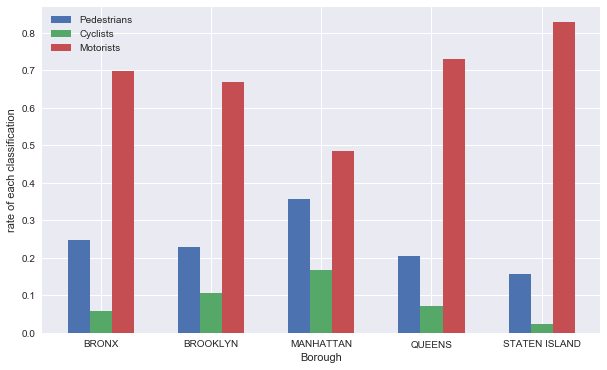

In [107]:
#injuredの地区別割合
plt.figure(figsize=(10,6),facecolor="white")
w=0.2
X = np.arange(5)
plt.bar(X, data_Bor_Injured_r.iloc[:,1], width=w,label='Pedestrians') #Y1
plt.bar(X+w, data_Bor_Injured_r.iloc[:,2],width=w,label='Cyclists') #Y2の棒グラフを隣に書く
plt.bar(X+2*w, data_Bor_Injured_r.iloc[:,3],width=w,label='Motorists') #Y2の棒グラフを隣に書く
plt.xticks(X+ w,[data_Bor_Injured.index[0],data_Bor_Injured.index[1],data_Bor_Injured.index[2],data_Bor_Injured.index[3],data_Bor_Injured.index[4]] )
plt.ylabel('rate of each classification')
plt.xlabel('Borough')
plt.legend()

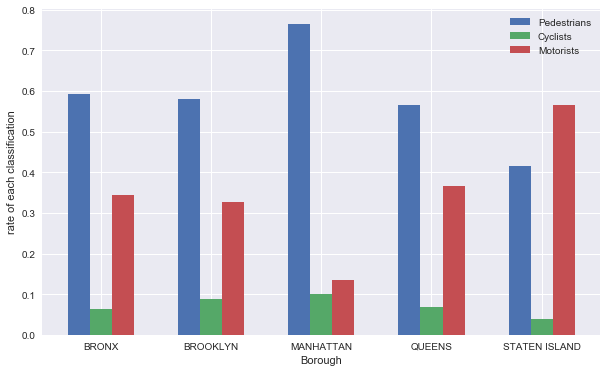

In [108]:
#killed の地域別割合
plt.figure(figsize=(10,6),facecolor="white")
w=0.2
X = np.arange(5)
plt.bar(X, data_Bor_Killed_r.iloc[:,1], width=w,label='Pedestrians') #Y1
plt.bar(X+w, data_Bor_Killed_r.iloc[:,2],width=w,label='Cyclists') #Y2の棒グラフを隣に書く
plt.bar(X+2*w, data_Bor_Killed_r.iloc[:,3],width=w,label='Motorists') #Y2の棒グラフを隣に書く
plt.xticks(X+ w,[data_Bor_Injured.index[0],data_Bor_Injured.index[1],data_Bor_Injured.index[2],data_Bor_Injured.index[3],data_Bor_Injured.index[4]] )
plt.ylabel('rate of each classification')
plt.xlabel('Borough')
plt.legend()

# Street and Contributing Factor

In [33]:
data['ON STREET NAME']=data['ON STREET NAME'].str.strip(' ')

In [14]:
data['ON STREET NAME'].value_counts()

BROADWAY                     6303
ATLANTIC AVENUE              5186
NORTHERN BOULEVARD           4788
3 AVENUE                     4619
                             4591
QUEENS BOULEVARD             4018
2 AVENUE                     3440
FLATBUSH AVENUE              3048
HYLAN BOULEVARD              2774
5 AVENUE                     2714
BRUCKNER BOULEVARD           2574
JAMAICA AVENUE               2572
10 AVENUE                    2506
PARK AVENUE                  2413
LINDEN BOULEVARD             2381
CANAL STREET                 2378
7 AVENUE                     2329
8 AVENUE                     2325
1 AVENUE                     2323
HILLSIDE AVENUE              2104
WOODHAVEN BOULEVARD          2065
9 AVENUE                     1953
METROPOLITAN AVENUE          1911
JEROME AVENUE                1894
11 AVENUE                    1856
WEST STREET                  1794
BEDFORD AVENUE               1790
OCEAN PARKWAY                1778
HORACE HARDING EXPRESSWAY    1716
LEXINGTON AVEN

In [2]:
data['ON STREET NAME'].nunique()

NameError: name 'data' is not defined

In [15]:
data_street_con=data.groupby('ON STREET NAME')['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()
data_street_con

ON STREET NAME                    CONTRIBUTING FACTOR VEHICLE 1                        
                                  Driver Inattention/Distraction                           1356
                                  Fatigued/Drowsy                                           476
                                  Backing Unsafely                                          463
                                  Failure to Yield Right-of-Way                             295
                                  Lost Consciousness                                        277
                                  Turning Improperly                                        163
                                  Driver Inexperience                                       135
                                  Other Vehicular                                           114
                                  Prescription Medication                                    93
                                  Traffic Contro

In [16]:
type(data['ON STREET NAME'][3])

str

In [17]:
data_broadway=data[data['ON STREET NAME'] == 'BROADWAY']
data_broadway['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Driver Inattention/Distraction                           1815
Failure to Yield Right-of-Way                             689
Fatigued/Drowsy                                           446
Other Vehicular                                           366
Turning Improperly                                        353
Backing Unsafely                                          329
Lost Consciousness                                        300
Prescription Medication                                   208
Driver Inexperience                                       184
Following Too Closely                                     173
Traffic Control Disregarded                               143
Passing or Lane Usage Improper                            124
Passenger Distraction                                     115
Outside Car Distraction                                   105
Unsafe Lane Changing                                      103
Alcohol Involvement                                        99
Physical

In [18]:
data_atlantic_avenue=data[data['ON STREET NAME'] == 'ATLANTIC AVENUE']
data_atlantic_avenue['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Driver Inattention/Distraction                           1533
Fatigued/Drowsy                                           521
Failure to Yield Right-of-Way                             386
Turning Improperly                                        366
Lost Consciousness                                        257
Following Too Closely                                     253
Other Vehicular                                           208
Backing Unsafely                                          147
Prescription Medication                                   146
Traffic Control Disregarded                               139
Unsafe Lane Changing                                      139
Outside Car Distraction                                   132
Pavement Slippery                                         103
Driver Inexperience                                       102
Alcohol Involvement                                        97
Passing or Lane Usage Improper                             92
Physical

In [19]:
data_northern_boulevard=data[data['ON STREET NAME'] == 'NORTHERN BOULEVARD']
data_northern_boulevard['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Driver Inattention/Distraction                           1134
Failure to Yield Right-of-Way                             719
Fatigued/Drowsy                                           620
Turning Improperly                                        341
Following Too Closely                                     243
Prescription Medication                                   236
Backing Unsafely                                          204
Lost Consciousness                                        173
Other Vehicular                                           115
Passing or Lane Usage Improper                            108
Unsafe Lane Changing                                       98
Alcohol Involvement                                        88
Physical Disability                                        84
Traffic Control Disregarded                                84
Pavement Slippery                                          82
Outside Car Distraction                                    74
Driver I

## 時系列ごとのデータ分析

In [ ]:
data_frame1 = data_frame.groupby([,''address])

In [124]:
#damage_timespan= DataFrame[]
data_2017['NUMBER OF PERSONS INJURED'].sum()
dt = {'NUMBER OF PERSONS INJURED':[data_2017['NUMBER OF PERSONS INJURED'].sum(),data_2016['NUMBER OF PERSONS INJURED'].sum(),data_2015['NUMBER OF PERSONS INJURED'].sum(),data_2014['NUMBER OF PERSONS INJURED'].sum(),data_2013['NUMBER OF PERSONS INJURED'].sum(),data_2012['NUMBER OF PERSONS INJURED'].sum()],\
     'NUMBER OF PEDESTRIANS INJURED':[data_2017['NUMBER OF PEDESTRIANS INJURED'].sum(),data_2016['NUMBER OF PEDESTRIANS INJURED'].sum(),data_2015['NUMBER OF PEDESTRIANS INJURED'].sum(),data_2014['NUMBER OF PEDESTRIANS INJURED'].sum(),data_2013['NUMBER OF PEDESTRIANS INJURED'].sum(),data_2012['NUMBER OF PEDESTRIANS INJURED'].sum()],\
      'NUMBER OF CYCLIST INJURED':[data_2017['NUMBER OF PERSONS INJURED'].sum(),data_2016['NUMBER OF PERSONS INJURED'].sum(),data_2015['NUMBER OF PERSONS INJURED'].sum(),data_2014['NUMBER OF PERSONS INJURED'].sum(),data_2013['NUMBER OF PERSONS INJURED'].sum(),data_2012['NUMBER OF PERSONS INJURED'].sum()]}\
    #  'NUMBER OF CYCLIST INJURED':,\
     # 'NUMBER OF MOTORIST INJURED':

In [125]:
dt

{'NUMBER OF CYCLIST INJURED': [48013, 58887, 51352, 51211, 55121, 27447],
 'NUMBER OF PEDESTRIANS INJURED': [9083, 11159, 10082, 11034, 11987, 5906],
 'NUMBER OF PERSONS INJURED': [48013, 58887, 51352, 51211, 55121, 27447]}

In [ ]:
#データフレーム作成まとめ
data = {'column1':[value1,value2,...], 'column2':[value1,value2,...],...}  #データテーブル

data_frame = DataFrame(data)  #データテーブルをpandasのDataFrame配列に格納

data_frame_index1 = DataFrame(data_frame, index = ['value1,value2,...'])  #インデックス付ける


## 時間帯ごとに事故数を抽出

In [ ]:
g = data.groupby(pd.TimeGrouper("M")) 
pd.DatetimeIndex(data.DATE).to_period("M")

In [8]:
per = data.DATE.dt.to_period("M")  # new way to get the same
data.groupby(per)['BOROUGH'].count()

DATE
2012-07    13152
2012-08    13174
2012-09    12802
2012-10    12989
2012-11    12244
2012-12    13210
2013-01    11979
2013-02    11246
2013-03    12809
2013-04    12712
2013-05    14335
2013-06    14045
2013-07    13281
2013-08    12656
2013-09    12861
2013-10    13418
2013-11    13427
2013-12    13197
2014-01    12713
2014-02    12142
2014-03    12128
2014-04    12419
2014-05    13709
2014-06    13971
2014-07    13193
2014-08    12864
2014-09    13503
2014-10    13774
2014-11    12886
2014-12    13023
           ...  
2015-06    14088
2015-07    14166
2015-08    14210
2015-09    14001
2015-10    15004
2015-11    13632
2015-12    14159
2016-01    13953
2016-02    12171
2016-03    14006
2016-04    14061
2016-05    14198
2016-06    12514
2016-07    12989
2016-08    12243
2016-09    12087
2016-10    12232
2016-11    12007
2016-12    11975
2017-01    10912
2017-02    10086
2017-03    12218
2017-04    11211
2017-05    13094
2017-06    13370
2017-07    12270
2017-08    11254
2017-09  

In [9]:
data_timespan=data.groupby(per)['BOROUGH'].count()

In [20]:
hour_data = data.groupby(pd.TimeGrouper(key='TIME', freq='1H'))['DATE'].count()
hour_data

TIME
1900-01-01 00:00:00    15869
1900-01-01 01:00:00     9274
1900-01-01 02:00:00     7044
1900-01-01 03:00:00     6112
1900-01-01 04:00:00     7102
1900-01-01 05:00:00     7748
1900-01-01 06:00:00    12152
1900-01-01 07:00:00    16694
1900-01-01 08:00:00    32984
1900-01-01 09:00:00    32431
1900-01-01 10:00:00    29755
1900-01-01 11:00:00    30881
1900-01-01 12:00:00    32459
1900-01-01 13:00:00    34526
1900-01-01 14:00:00    39780
1900-01-01 15:00:00    36715
1900-01-01 16:00:00    44328
1900-01-01 17:00:00    42670
1900-01-01 18:00:00    37150
1900-01-01 19:00:00    30377
1900-01-01 20:00:00    25177
1900-01-01 21:00:00    20899
1900-01-01 22:00:00    18519
1900-01-01 23:00:00    15295
Freq: H, Name: DATE, dtype: int64

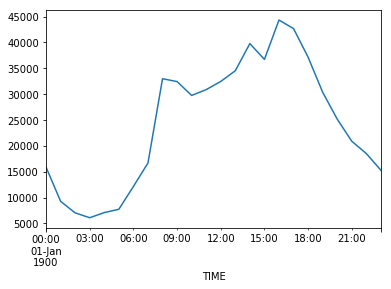

In [21]:
hour_data.plot()

In [23]:
data.groupby(pd.TimeGrouper(key='TIME', freq='1H'))['CONTRIBUTING FACTOR VEHICLE 1'].agg(lambda x:x.value_counts().index[0])

TIME
1900-01-01 00:00:00    Driver Inattention/Distraction
1900-01-01 01:00:00    Driver Inattention/Distraction
1900-01-01 02:00:00    Driver Inattention/Distraction
1900-01-01 03:00:00    Driver Inattention/Distraction
1900-01-01 04:00:00    Driver Inattention/Distraction
1900-01-01 05:00:00    Driver Inattention/Distraction
1900-01-01 06:00:00    Driver Inattention/Distraction
1900-01-01 07:00:00    Driver Inattention/Distraction
1900-01-01 08:00:00    Driver Inattention/Distraction
1900-01-01 09:00:00    Driver Inattention/Distraction
1900-01-01 10:00:00    Driver Inattention/Distraction
1900-01-01 11:00:00    Driver Inattention/Distraction
1900-01-01 12:00:00    Driver Inattention/Distraction
1900-01-01 13:00:00    Driver Inattention/Distraction
1900-01-01 14:00:00    Driver Inattention/Distraction
1900-01-01 15:00:00    Driver Inattention/Distraction
1900-01-01 16:00:00    Driver Inattention/Distraction
1900-01-01 17:00:00    Driver Inattention/Distraction
1900-01-01 18:00:00    

In [24]:
data.groupby(pd.TimeGrouper(key='TIME', freq='1H'))['CONTRIBUTING FACTOR VEHICLE 1'].agg(lambda x:x.value_counts().max())

TIME
1900-01-01 00:00:00     4438
1900-01-01 01:00:00     2391
1900-01-01 02:00:00     1733
1900-01-01 03:00:00     1459
1900-01-01 04:00:00     1633
1900-01-01 05:00:00     1884
1900-01-01 06:00:00     3154
1900-01-01 07:00:00     4382
1900-01-01 08:00:00     9018
1900-01-01 09:00:00     9060
1900-01-01 10:00:00     8403
1900-01-01 11:00:00     8804
1900-01-01 12:00:00     9385
1900-01-01 13:00:00     9868
1900-01-01 14:00:00    11538
1900-01-01 15:00:00    10679
1900-01-01 16:00:00    12929
1900-01-01 17:00:00    12540
1900-01-01 18:00:00    10768
1900-01-01 19:00:00     8899
1900-01-01 20:00:00     7218
1900-01-01 21:00:00     5946
1900-01-01 22:00:00     5253
1900-01-01 23:00:00     4218
Freq: H, Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

In [25]:
data.groupby(pd.TimeGrouper(key='TIME', freq='1H'))['CONTRIBUTING FACTOR VEHICLE 1'].agg(lambda x:x.value_counts().index[1])

TIME
1900-01-01 00:00:00    Failure to Yield Right-of-Way
1900-01-01 01:00:00              Alcohol Involvement
1900-01-01 02:00:00              Alcohol Involvement
1900-01-01 03:00:00              Alcohol Involvement
1900-01-01 04:00:00              Alcohol Involvement
1900-01-01 05:00:00              Alcohol Involvement
1900-01-01 06:00:00                  Fatigued/Drowsy
1900-01-01 07:00:00    Failure to Yield Right-of-Way
1900-01-01 08:00:00    Failure to Yield Right-of-Way
1900-01-01 09:00:00    Failure to Yield Right-of-Way
1900-01-01 10:00:00    Failure to Yield Right-of-Way
1900-01-01 11:00:00    Failure to Yield Right-of-Way
1900-01-01 12:00:00    Failure to Yield Right-of-Way
1900-01-01 13:00:00    Failure to Yield Right-of-Way
1900-01-01 14:00:00    Failure to Yield Right-of-Way
1900-01-01 15:00:00    Failure to Yield Right-of-Way
1900-01-01 16:00:00                  Fatigued/Drowsy
1900-01-01 17:00:00    Failure to Yield Right-of-Way
1900-01-01 18:00:00    Failure to Yield R

In [26]:
data.groupby(pd.TimeGrouper(key='TIME', freq='1H'))['CONTRIBUTING FACTOR VEHICLE 1'].agg(lambda x:x.value_counts().index[2])

TIME
1900-01-01 00:00:00                  Fatigued/Drowsy
1900-01-01 01:00:00                  Fatigued/Drowsy
1900-01-01 02:00:00                  Other Vehicular
1900-01-01 03:00:00      Traffic Control Disregarded
1900-01-01 04:00:00                  Other Vehicular
1900-01-01 05:00:00                  Other Vehicular
1900-01-01 06:00:00    Failure to Yield Right-of-Way
1900-01-01 07:00:00                  Fatigued/Drowsy
1900-01-01 08:00:00                  Fatigued/Drowsy
1900-01-01 09:00:00                  Fatigued/Drowsy
1900-01-01 10:00:00                  Fatigued/Drowsy
1900-01-01 11:00:00                 Backing Unsafely
1900-01-01 12:00:00                 Backing Unsafely
1900-01-01 13:00:00                 Backing Unsafely
1900-01-01 14:00:00                  Fatigued/Drowsy
1900-01-01 15:00:00                  Fatigued/Drowsy
1900-01-01 16:00:00    Failure to Yield Right-of-Way
1900-01-01 17:00:00                  Fatigued/Drowsy
1900-01-01 18:00:00                  Fati

In [27]:
data.groupby(pd.TimeGrouper(key='TIME', freq='1H'))['BOROUGH'].agg(lambda x:x.value_counts().index[0])

TIME
1900-01-01 00:00:00    MANHATTAN
1900-01-01 01:00:00    MANHATTAN
1900-01-01 02:00:00    MANHATTAN
1900-01-01 03:00:00    MANHATTAN
1900-01-01 04:00:00    MANHATTAN
1900-01-01 05:00:00    MANHATTAN
1900-01-01 06:00:00    MANHATTAN
1900-01-01 07:00:00     BROOKLYN
1900-01-01 08:00:00       QUEENS
1900-01-01 09:00:00     BROOKLYN
1900-01-01 10:00:00    MANHATTAN
1900-01-01 11:00:00    MANHATTAN
1900-01-01 12:00:00    MANHATTAN
1900-01-01 13:00:00    MANHATTAN
1900-01-01 14:00:00    MANHATTAN
1900-01-01 15:00:00     BROOKLYN
1900-01-01 16:00:00     BROOKLYN
1900-01-01 17:00:00     BROOKLYN
1900-01-01 18:00:00    MANHATTAN
1900-01-01 19:00:00    MANHATTAN
1900-01-01 20:00:00    MANHATTAN
1900-01-01 21:00:00    MANHATTAN
1900-01-01 22:00:00    MANHATTAN
1900-01-01 23:00:00    MANHATTAN
Freq: H, Name: BOROUGH, dtype: object

In [29]:
data.groupby(pd.TimeGrouper(key='TIME', freq='1H'))['ON STREET NAME'].agg(lambda x:x.value_counts().index[0])

TIME
1900-01-01 00:00:00              BROADWAY
1900-01-01 01:00:00              BROADWAY
1900-01-01 02:00:00              BROADWAY
1900-01-01 03:00:00              BROADWAY
1900-01-01 04:00:00              BROADWAY
1900-01-01 05:00:00       ATLANTIC AVENUE
1900-01-01 06:00:00       ATLANTIC AVENUE
1900-01-01 07:00:00                      
1900-01-01 08:00:00              BROADWAY
1900-01-01 09:00:00    NORTHERN BOULEVARD
1900-01-01 10:00:00              BROADWAY
1900-01-01 11:00:00              BROADWAY
1900-01-01 12:00:00              BROADWAY
1900-01-01 13:00:00              BROADWAY
1900-01-01 14:00:00              BROADWAY
1900-01-01 15:00:00              BROADWAY
1900-01-01 16:00:00              BROADWAY
1900-01-01 17:00:00    NORTHERN BOULEVARD
1900-01-01 18:00:00              BROADWAY
1900-01-01 19:00:00              BROADWAY
1900-01-01 20:00:00              BROADWAY
1900-01-01 21:00:00              BROADWAY
1900-01-01 22:00:00              BROADWAY
1900-01-01 23:00:00          

In [37]:
data_manhattan = data[data['BOROUGH']=='MANHATTAN']
data_brooklyn = data[data['BOROUGH']=='BROOKLYN']
data_queens = data[data['BOROUGH']=='QUEENS']
data_bronx = data[data['BOROUGH']=='BRONX']
data_staten = data[data['BOROUGH']=='STATEN ISLAND']

In [63]:
manhattan_time = data_manhattan.groupby(pd.TimeGrouper(key='TIME', freq='1H'))['DATE'].count()
manhattan_timeP = manhattan_time/manhattan_time.sum()

brooklyn_time = data_brooklyn.groupby(pd.TimeGrouper(key='TIME', freq='1H'))['DATE'].count()
brooklyn_timeP = brooklyn_time/brooklyn_time.sum()

queens_time = data_queens.groupby(pd.TimeGrouper(key='TIME', freq='1H'))['DATE'].count()
queens_timeP = queens_time/queens_time.sum()

bronx_time = data_bronx.groupby(pd.TimeGrouper(key='TIME', freq='1H'))['DATE'].count()
bronx_timeP = bronx_time/bronx_time.sum()

staten_time = data_staten.groupby(pd.TimeGrouper(key='TIME', freq='1H'))['DATE'].count()
staten_timeP = staten_time/staten_time.sum()

In [69]:
idx= ['MANHATTAN','BROOKLYN','QUEENS','BRONX','STATEN ISLAND']
df = DataFrame([manhattan_timeP, brooklyn_timeP, queens_timeP, bronx_timeP, staten_timeP], index=idx)
df

TIME,1900-01-01 00:00:00,1900-01-01 01:00:00,1900-01-01 02:00:00,1900-01-01 03:00:00,1900-01-01 04:00:00,1900-01-01 05:00:00,1900-01-01 06:00:00,1900-01-01 07:00:00,1900-01-01 08:00:00,1900-01-01 09:00:00,...,1900-01-01 14:00:00,1900-01-01 15:00:00,1900-01-01 16:00:00,1900-01-01 17:00:00,1900-01-01 18:00:00,1900-01-01 19:00:00,1900-01-01 20:00:00,1900-01-01 21:00:00,1900-01-01 22:00:00,1900-01-01 23:00:00
MANHATTAN,0.032216,0.020097,0.014999,0.012639,0.012488,0.011732,0.017023,0.020836,0.043957,0.051859,...,0.067799,0.057041,0.071033,0.066775,0.060426,0.053119,0.046426,0.039203,0.036617,0.030914
BROOKLYN,0.025230,0.014359,0.011095,0.009441,0.011392,0.011608,0.017893,0.025931,0.055764,0.057527,...,0.071373,0.065358,0.076543,0.072659,0.062535,0.050019,0.041693,0.034904,0.029914,0.023737
QUEENS,0.021552,0.012145,0.009332,0.008923,0.011042,0.012629,0.018835,0.027102,0.064695,0.057017,...,0.070634,0.064695,0.076289,0.075718,0.067223,0.053729,0.044274,0.035759,0.030770,0.022579
BRONX,0.027323,0.016087,0.012433,0.010774,0.013399,0.013693,0.021274,0.033539,0.066469,0.059539,...,0.065923,0.057334,0.074450,0.070817,0.060568,0.050571,0.041919,0.036290,0.030578,0.024467
STATEN ISLAND,0.018151,0.010389,0.008404,0.008229,0.007529,0.008288,0.015817,0.027197,0.062916,0.049551,...,0.073830,0.072779,0.088946,0.083868,0.073947,0.054336,0.043072,0.034901,0.023871,0.020486


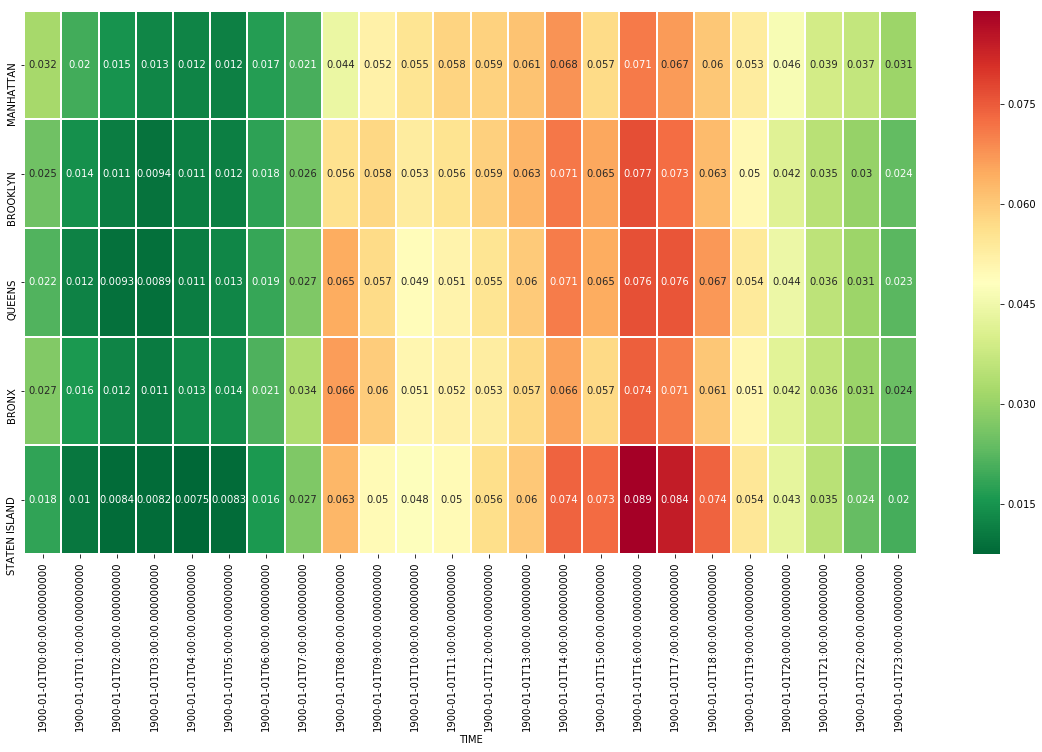

In [73]:
plt.figure(figsize=(20, 10))

# _r reverses the normal order of the color map 'RdYlGn'
sns.heatmap(df, cmap='RdYlGn_r', linewidths=1, annot=True)

In [59]:
state_pcts

TIME
1900-01-01 00:00:00    100.0
1900-01-01 01:00:00    100.0
1900-01-01 02:00:00    100.0
1900-01-01 03:00:00    100.0
1900-01-01 04:00:00    100.0
1900-01-01 05:00:00    100.0
1900-01-01 06:00:00    100.0
1900-01-01 07:00:00    100.0
1900-01-01 08:00:00    100.0
1900-01-01 09:00:00    100.0
1900-01-01 10:00:00    100.0
1900-01-01 11:00:00    100.0
1900-01-01 12:00:00    100.0
1900-01-01 13:00:00    100.0
1900-01-01 14:00:00    100.0
1900-01-01 15:00:00    100.0
1900-01-01 16:00:00    100.0
1900-01-01 17:00:00    100.0
1900-01-01 18:00:00    100.0
1900-01-01 19:00:00    100.0
1900-01-01 20:00:00    100.0
1900-01-01 21:00:00    100.0
1900-01-01 22:00:00    100.0
1900-01-01 23:00:00    100.0
Freq: H, Name: DATE, dtype: float64

# Last Parts

In [16]:
data_m1 = data[data['DATE'].dt.month==1]
data_m2 = data[data['DATE'].dt.month==2]
data_m3 = data[data['DATE'].dt.month==3]
data_m4 = data[data['DATE'].dt.month==4]
data_m5 = data[data['DATE'].dt.month==5]
data_m6 = data[data['DATE'].dt.month==6]
data_m7 = data[data['DATE'].dt.month==7]
data_m8 = data[data['DATE'].dt.month==8]
data_m9 = data[data['DATE'].dt.month==9]
data_m10 = data[data['DATE'].dt.month==10]
data_m11 = data[data['DATE'].dt.month==11]
data_m12 = data[data['DATE'].dt.month==12]

In [26]:
m1_time = data_m1.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
m2_time = data_m2.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
m3_time = data_m3.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
m4_time = data_m4.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
m5_time = data_m5.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
m6_time = data_m6.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
m7_time = data_m7.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
m8_time = data_m8.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
m9_time = data_m9.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
m10_time = data_m10.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
m11_time = data_m11.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
m12_time = data_m12.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()

In [22]:
m1_time

TIME
1900-01-01 00:00:00    2466
1900-01-01 03:00:00    1823
1900-01-01 06:00:00    5305
1900-01-01 09:00:00    7611
1900-01-01 12:00:00    8120
1900-01-01 15:00:00    9036
1900-01-01 18:00:00    7043
1900-01-01 21:00:00    3837
Freq: 3H, Name: DATE, dtype: int64

In [27]:
idx= ['1','2','3','4','5','6','7','8','9','10','11','12']
df = DataFrame([m1_time, m2_time, m3_time, m4_time, m5_time, m6_time, m7_time, m8_time, m9_time, m10_time, m11_time, m12_time], index=idx)
df.columns = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24']
df

,0-3,3-6,6-9,9-12,12-15,15-18,18-21,21-24
1,2466,1823,5305,7611,8120,9036,7043,3837
2,2064,1543,4867,7046,7611,8324,6550,3673
3,2388,1756,5753,8139,8998,10577,7382,4478
4,2585,1701,5128,7334,8681,10427,7353,4339
5,2282,1347,4407,6636,7688,9505,6563,3987
6,2424,1329,4129,6473,7923,9395,6932,4007
7,2812,1567,4149,7224,8988,10216,7573,4805
8,2850,1713,4056,7477,9206,10298,7512,4863
9,3263,1983,6253,9471,10431,12881,8926,5643
10,3510,2353,7288,10333,11541,13379,10095,5969


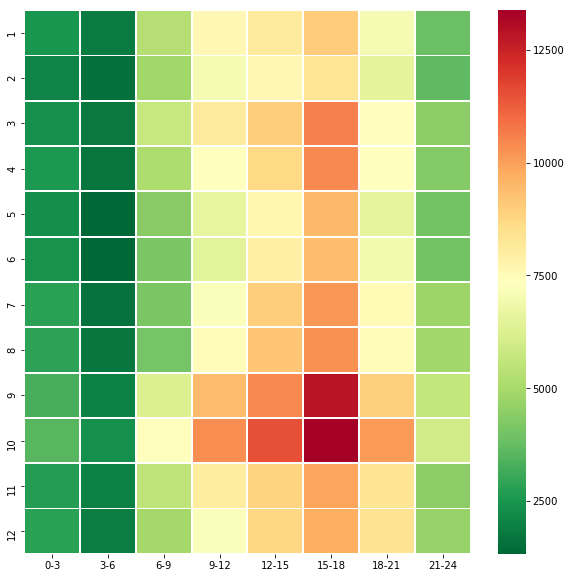

In [30]:
plt.figure(figsize=(10, 10))

# _r reverses the normal order of the color map 'RdYlGn'
sns.heatmap(df, cmap='RdYlGn_r', linewidths=1)

In [32]:
m10_time = data_m10.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()
m10_time

TIME                 CONTRIBUTING FACTOR VEHICLE 1                        
1900-01-01 00:00:00  Driver Inattention/Distraction                           973
                     Alcohol Involvement                                      224
                     Failure to Yield Right-of-Way                            219
                     Other Vehicular                                          181
                     Fatigued/Drowsy                                          179
                     Following Too Closely                                    167
                     Backing Unsafely                                         158
                     Traffic Control Disregarded                              148
                     Turning Improperly                                       143
                     Passing or Lane Usage Improper                           104
                     Unsafe Speed                                              99
                     Dr

In [35]:
data['CONTRIBUTING FACTOR VEHICLE 1']=data['CONTRIBUTING FACTOR VEHICLE 1'].str.strip(' ')
data['VEHICLE TYPE CODE 1']=data['VEHICLE TYPE CODE 1'].str.strip(' ')

In [36]:
data_ps = data[data['VEHICLE TYPE CODE 1']=='PASSENGER VEHICLE']
data_ps

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2017-11-06,1900-01-01 00:00:00,BROOKLYN,11203,40.660206,-73.937750,"(40.660206, -73.93775)",NaN,NaN,699 RUTLAND ROAD,...,Unspecified,NaN,NaN,NaN,3784601,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN
2,2017-11-06,1900-01-01 00:00:00,BROOKLYN,11208,40.677700,-73.874050,"(40.6777, -73.87405)",LIBERTY AVENUE,CHESTNUT STREET,NaN,...,Unspecified,NaN,NaN,NaN,3785108,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
3,2017-11-06,1900-01-01 00:00:00,MANHATTAN,10036,NaN,NaN,NaN,WEST 48 STREET,12 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3784857,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN
7,2017-11-06,1900-01-01 00:00:00,BROOKLYN,11221,40.697420,-73.931340,"(40.69742, -73.93134)",MYRTLE AVENUE,WILLOUGHBY AVENUE,NaN,...,Unspecified,Unspecified,NaN,NaN,3784840,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN
12,2017-11-06,1900-01-01 00:26:00,NaN,NaN,40.714096,-73.955900,"(40.714096, -73.9559)",METROPOLITAN AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,3784087,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
16,2017-11-06,1900-01-01 10:00:00,BROOKLYN,11221,40.693690,-73.931210,"(40.69369, -73.93121)",DE KALB AVENUE,REID AVENUE,NaN,...,NaN,NaN,NaN,NaN,3785026,PASSENGER VEHICLE,FB,NaN,NaN,NaN
24,2017-11-06,1900-01-01 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3785102,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
26,2017-11-06,1900-01-01 10:03:00,NaN,NaN,NaN,NaN,NaN,MOUNT EDEN,JEROME AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3784631,PASSENGER VEHICLE,DS,NaN,NaN,NaN
29,2017-11-06,1900-01-01 10:09:00,QUEENS,11106,40.758503,-73.929306,"(40.758503, -73.929306)",35 AVENUE,30 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3785151,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
34,2017-11-06,1900-01-01 10:29:00,NaN,NaN,40.828510,-73.880120,"(40.82851, -73.88012)",WESTCHESTER AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,3784336,PASSENGER VEHICLE,TK,NaN,NaN,NaN


In [37]:
data_ps_m1 = data_ps[data_ps['DATE'].dt.month==1]
data_ps_m2 = data_ps[data_ps['DATE'].dt.month==2]
data_ps_m3 = data_ps[data_ps['DATE'].dt.month==3]
data_ps_m4 = data_ps[data_ps['DATE'].dt.month==4]
data_ps_m5 = data_ps[data_ps['DATE'].dt.month==5]
data_ps_m6 = data_ps[data_ps['DATE'].dt.month==6]
data_ps_m7 = data_ps[data_ps['DATE'].dt.month==7]
data_ps_m8 = data_ps[data_ps['DATE'].dt.month==8]
data_ps_m9 = data_ps[data_ps['DATE'].dt.month==9]
data_ps_m10 = data_ps[data_ps['DATE'].dt.month==10]
data_ps_m11 = data_ps[data_ps['DATE'].dt.month==11]
data_ps_m12 = data_ps[data_ps['DATE'].dt.month==12]

In [38]:
ps_m1_time = data_ps_m1.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
ps_m2_time = data_ps_m2.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
ps_m3_time = data_ps_m3.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
ps_m4_time = data_ps_m4.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
ps_m5_time = data_ps_m5.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
ps_m6_time = data_ps_m6.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
ps_m7_time = data_ps_m7.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
ps_m8_time = data_ps_m8.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
ps_m9_time = data_ps_m9.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
ps_m10_time = data_ps_m10.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
ps_m11_time = data_ps_m11.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()
ps_m12_time = data_ps_m12.groupby(pd.TimeGrouper(key='TIME', freq='3H'))['DATE'].count()

In [39]:
idx= ['1','2','3','4','5','6','7','8','9','10','11','12']
df = DataFrame([ps_m1_time, ps_m2_time, ps_m3_time, ps_m4_time, ps_m5_time, ps_m6_time, ps_m7_time, ps_m8_time, ps_m9_time, ps_m10_time, ps_m11_time, ps_m12_time], index=idx)
df.columns = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24']
df

,0-3,3-6,6-9,9-12,12-15,15-18,18-21,21-24
1,1365,980,2678,3614,4063,4611,3749,2046
2,1074,814,2480,3402,3699,4186,3475,1978
3,1472,1087,3329,4513,5168,6176,4522,2735
4,1685,1109,3143,4309,5292,6517,4551,2789
5,1251,773,2207,3227,3851,4868,3466,2130
6,1285,689,2051,3080,3905,4754,3688,2157
7,1544,861,2005,3429,4476,5328,4080,2612
8,1628,974,2014,3594,4660,5318,4059,2665
9,1741,1061,3246,4563,5191,6661,4824,3118
10,1915,1266,3604,5006,5653,6834,5416,3237


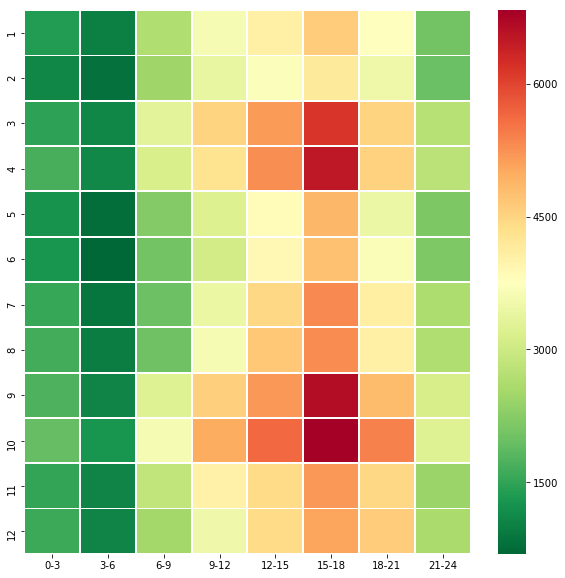

In [40]:
plt.figure(figsize=(10, 10))

# _r reverses the normal order of the color map 'RdYlGn'
sns.heatmap(df, cmap='RdYlGn_r', linewidths=1)

In [48]:
data_ps_m10_1518 = data_ps_m10[(data_ps_m10['TIME']>='1900-01-01 15:00') & (data_ps_m10['TIME']<'1900-01-01 18:00')]
data_ps_m10_1518['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Driver Inattention/Distraction                           2095
Failure to Yield Right-of-Way                             684
Fatigued/Drowsy                                           539
Following Too Closely                                     458
Backing Unsafely                                          412
Other Vehicular                                           398
Turning Improperly                                        299
Passing or Lane Usage Improper                            203
Lost Consciousness                                        187
Driver Inexperience                                       177
Unsafe Lane Changing                                      155
Traffic Control Disregarded                               145
Prescription Medication                                   144
Physical Disability                                       102
Reaction to Other Uninvolved Vehicle                       93
Outside Car Distraction                                    93
View Obs

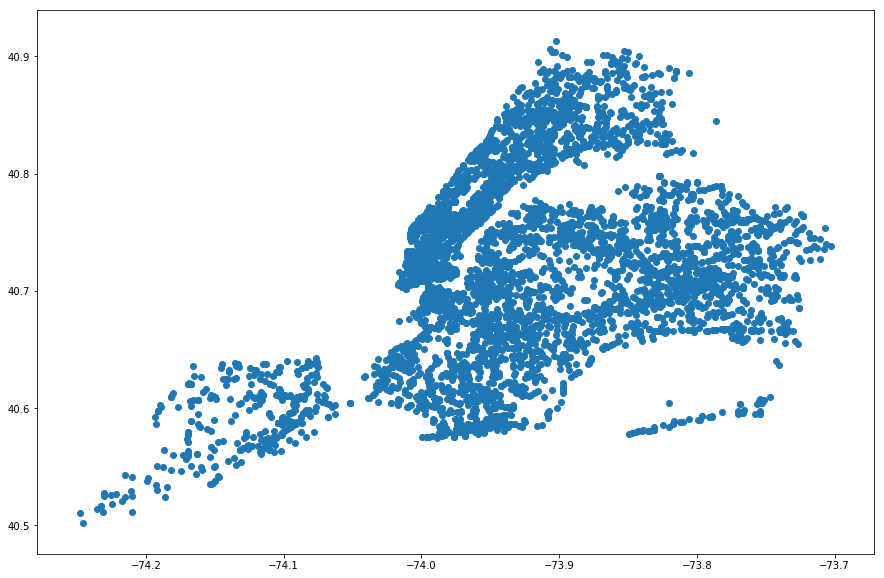

In [57]:
ps_m10_1518_x = data_ps_m10_1518['LONGITUDE']
ps_m10_1518_y = data_ps_m10_1518['LATITUDE']

plt.figure(figsize=(15,10))

plt.scatter(ps_m10_1518_x, ps_m10_1518_y)

In [49]:
data_ps_m9_1518 = data_ps_m9[(data_ps_m9['TIME']>='1900-01-01 15:00') & (data_ps_m9['TIME']<'1900-01-01 18:00')]
data_ps_m9_1518['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Driver Inattention/Distraction                           2023
Failure to Yield Right-of-Way                             674
Fatigued/Drowsy                                           573
Following Too Closely                                     431
Backing Unsafely                                          389
Other Vehicular                                           369
Turning Improperly                                        294
Driver Inexperience                                       197
Lost Consciousness                                        182
Passing or Lane Usage Improper                            178
Traffic Control Disregarded                               165
Prescription Medication                                   165
Unsafe Lane Changing                                      156
Outside Car Distraction                                   102
Physical Disability                                        95
Reaction to Other Uninvolved Vehicle                       77
View Obs

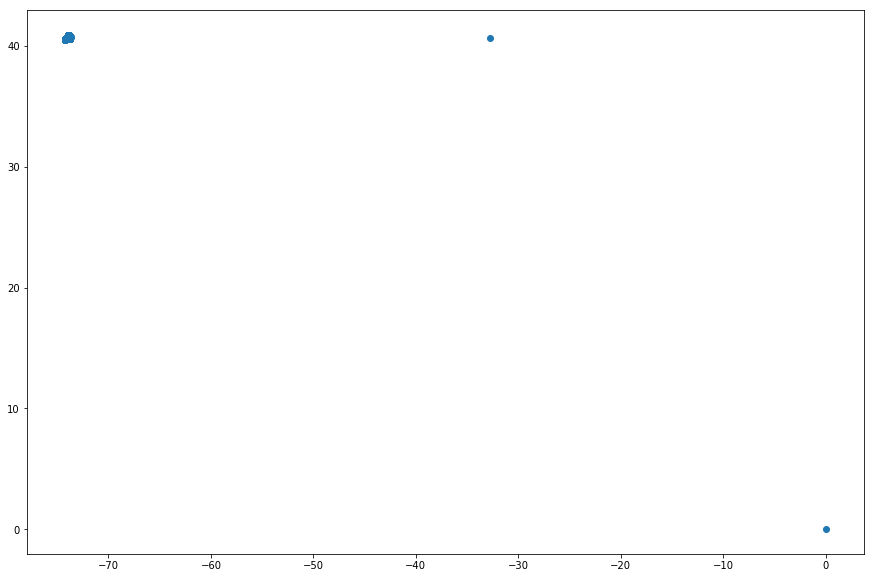

In [58]:
ps_m9_1518_x = data_ps_m9_1518['LONGITUDE']
ps_m9_1518_y = data_ps_m9_1518['LATITUDE']

plt.figure(figsize=(15,10))

plt.scatter(ps_m9_1518_x, ps_m9_1518_y)

In [50]:
data_ps_m4_1518 = data_ps_m4[(data_ps_m4['TIME']>='1900-01-01 15:00') & (data_ps_m4['TIME']<'1900-01-01 18:00')]
data_ps_m4_1518['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Driver Inattention/Distraction                           1966
Fatigued/Drowsy                                           807
Failure to Yield Right-of-Way                             638
Backing Unsafely                                          375
Turning Improperly                                        310
Other Vehicular                                           296
Lost Consciousness                                        265
Following Too Closely                                     250
Prescription Medication                                   209
Driver Inexperience                                       184
Traffic Control Disregarded                               155
Outside Car Distraction                                   110
Physical Disability                                       103
Passing or Lane Usage Improper                             88
Unsafe Lane Changing                                       69
Pavement Slippery                                          53
View Obs

In [51]:
data_ps_m3_1518 = data_ps_m3[(data_ps_m3['TIME']>='1900-01-01 15:00') & (data_ps_m3['TIME']<'1900-01-01 18:00')]
data_ps_m3_1518['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Driver Inattention/Distraction                           1826
Fatigued/Drowsy                                           655
Failure to Yield Right-of-Way                             601
Backing Unsafely                                          369
Other Vehicular                                           284
Turning Improperly                                        263
Lost Consciousness                                        256
Following Too Closely                                     251
Prescription Medication                                   183
Traffic Control Disregarded                               146
Driver Inexperience                                       137
Outside Car Distraction                                   123
Pavement Slippery                                         115
Physical Disability                                       108
Unsafe Lane Changing                                       82
Passing or Lane Usage Improper                             80
View Obs

In [52]:
data_ps_m10_1215 = data_ps_m10[(data_ps_m10['TIME']>='1900-01-01 12:00') & (data_ps_m10['TIME']<'1900-01-01 15:00')]
data_ps_m10_1215['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Driver Inattention/Distraction                           1739
Failure to Yield Right-of-Way                             578
Backing Unsafely                                          414
Fatigued/Drowsy                                           398
Other Vehicular                                           375
Following Too Closely                                     340
Turning Improperly                                        222
Driver Inexperience                                       143
Passing or Lane Usage Improper                            141
Unsafe Lane Changing                                      137
Lost Consciousness                                        136
Prescription Medication                                   126
Traffic Control Disregarded                               115
Outside Car Distraction                                    91
Reaction to Other Uninvolved Vehicle                       68
Physical Disability                                        67
Pavement

# Alcohol Cause Mapping

In [10]:
data_alcohol=data[data['CONTRIBUTING FACTOR VEHICLE 1']=='Alcohol Involvement']
data_alcohol

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
232,2017-10-22,1900-01-01 17:35:00,MANHATTAN,10013,40.713430,-73.996270,"(40.71343, -73.99627)",NaN,NaN,51 MULBERRY STREET,...,NaN,NaN,NaN,NaN,3774965,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
383,2017-10-22,1900-01-01 03:10:00,BROOKLYN,11235,40.578900,-73.953270,"(40.5789, -73.95327)",NaN,NaN,111 WEST END AVENUE,...,NaN,NaN,NaN,NaN,3774731,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
385,2017-10-22,1900-01-01 03:10:00,NaN,NaN,40.854820,-73.911200,"(40.85482, -73.9112)",UNIVERSITY AVENUE,WEST BURNSIDE AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3774281,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
392,2017-10-22,1900-01-01 03:46:00,NaN,NaN,40.750530,-73.876884,"(40.75053, -73.876884)",37 AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3773828,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
407,2017-10-22,1900-01-01 04:25:00,QUEENS,11415,40.706055,-73.831440,"(40.706055, -73.83144)",NaN,NaN,119-11 METROPOLITAN AVENUE,...,Unspecified,Unspecified,Unspecified,NaN,3774806,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN
413,2017-10-22,1900-01-01 04:50:00,MANHATTAN,10002,40.720234,-73.984480,"(40.720234, -73.98448)",STANTON STREET,CLINTON STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3774875,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
416,2017-10-22,1900-01-01 04:58:00,QUEENS,11417,40.676353,-73.857830,"(40.676353, -73.85783)",NaN,NaN,107-19 79 STREET,...,Unspecified,Unspecified,NaN,NaN,3774162,PICK-UP TRUCK,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN
419,2017-10-22,1900-01-01 05:25:00,BROOKLYN,11236,40.647890,-73.910720,"(40.64789, -73.91072)",AVENUE D,EAST 93 STREET,NaN,...,Unspecified,Unspecified,NaN,NaN,3774395,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN
430,2017-10-22,1900-01-01 07:00:00,MANHATTAN,10027,40.809746,-73.958916,"(40.809746, -73.958916)",NaN,NaN,1233 AMSTERDAM AVENUE,...,Unspecified,Unspecified,NaN,NaN,3774878,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN
434,2017-10-22,1900-01-01 07:20:00,NaN,NaN,40.600320,-73.985950,"(40.60032, -73.98595)",STILLWELL AVENUE,NaN,NaN,...,Unspecified,Unspecified,NaN,NaN,3774082,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN


In [11]:
data_alcohol.to_csv("data_alcohol.csv")